<a href="https://colab.research.google.com/github/Ammulya/Facial-Keypoint-detection/blob/master/facial_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive/


In [0]:
import os
os.chdir('/drive/My Drive/PROJECTS')

In [0]:
#Import the all the necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [0]:
#Load the data 
data = pd.read_csv('./Facial points/training.csv')

data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


## Data Preprocessing

In [0]:
#Check the any missing and null values in the dataFrame
data.isnull().sum().value_counts()

4779    6
4781    4
0       3
4813    2
4824    2
4778    2
4782    2
13      2
4780    2
10      2
4774    2
33      2
dtype: int64

In [0]:
# It will give you all the null values list with each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

### Handling with the missing values and null values

In [0]:
#we are filling the missing values  with the mean of the data in each column
data['left_eye_center_x'].fillna(data['left_eye_center_x'].mean(), inplace = True)
data['left_eye_center_y'].fillna(data['left_eye_center_y'].mean(), inplace = True)
data['right_eye_center_x'].fillna(data['right_eye_center_x'].mean(), inplace = True)
data['right_eye_center_y'].fillna(data['right_eye_center_y'].mean(), inplace = True)

In [0]:
data['left_eye_inner_corner_x'].fillna(data['left_eye_inner_corner_x'].mean(), inplace = True)
data['left_eye_inner_corner_y'].fillna(data['left_eye_inner_corner_y'].mean(), inplace = True)
data['left_eye_outer_corner_x'].fillna(data['left_eye_outer_corner_x'].mean(), inplace = True)
data['left_eye_outer_corner_y'].fillna(data['left_eye_outer_corner_y'].mean(), inplace = True)
data['right_eye_inner_corner_x'].fillna(data['right_eye_inner_corner_x'].mean(), inplace = True)
data['right_eye_inner_corner_y'].fillna(data['right_eye_inner_corner_y'].mean(), inplace = True)
data['right_eye_outer_corner_x'].fillna(data['right_eye_outer_corner_x'].mean(), inplace = True)
data['right_eye_outer_corner_y'].fillna(data['right_eye_outer_corner_y'].mean(), inplace = True)
data['left_eyebrow_inner_end_x'].fillna(data['left_eyebrow_inner_end_x'].mean(), inplace = True)
data['left_eyebrow_inner_end_y'].fillna(data['left_eyebrow_inner_end_y'].mean(), inplace = True)
data['left_eyebrow_outer_end_x'].fillna(data['left_eyebrow_outer_end_x'].mean(), inplace = True)
data['left_eyebrow_outer_end_y'].fillna(data['left_eyebrow_outer_end_y'].mean(), inplace = True)
data['right_eyebrow_inner_end_x'].fillna(data['right_eyebrow_inner_end_x'].mean(), inplace = True)
data['right_eyebrow_inner_end_y'].fillna(data['right_eyebrow_inner_end_y'].mean(), inplace = True)
data['right_eyebrow_outer_end_x'].fillna(data['right_eyebrow_outer_end_x'].mean(), inplace = True)
data['right_eyebrow_outer_end_y'].fillna(data['right_eyebrow_outer_end_y'].mean(), inplace = True)

In [0]:
data['mouth_left_corner_x'].fillna(data['mouth_left_corner_x'].mean(), inplace = True)
data['mouth_left_corner_y'].fillna(data['mouth_left_corner_y'].mean(), inplace = True)
data['mouth_right_corner_x'].fillna(data['mouth_right_corner_x'].mean(), inplace = True)
data['mouth_right_corner_y'].fillna(data['mouth_right_corner_y'].mean(), inplace = True)
data['mouth_center_top_lip_x'].fillna(data['mouth_center_top_lip_x'].mean(), inplace = True)
data['mouth_center_top_lip_y'].fillna(data['mouth_center_top_lip_y'].mean(), inplace = True)
data['mouth_center_bottom_lip_x'].fillna(data['mouth_center_bottom_lip_x'].mean(), inplace = True)
data['mouth_center_bottom_lip_y'].fillna(data['mouth_center_bottom_lip_y'].mean(), inplace = True)
data['mouth_center_top_lip_x'].fillna(data['mouth_center_top_lip_x'].mean(), inplace = True)




In [0]:
#Rechecking for the null values
#All the null values are filled,therefore no null values are found
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7049 non-null float64
left_eye_center_y            7049 non-null float64
right_eye_center_x           7049 non-null float64
right_eye_center_y           7049 non-null float64
left_eye_inner_corner_x      7049 non-null float64
left_eye_inner_corner_y      7049 non-null float64
left_eye_outer_corner_x      7049 non-null float64
left_eye_outer_corner_y      7049 non-null float64
right_eye_inner_corner_x     7049 non-null float64
right_eye_inner_corner_y     7049 non-null float64
right_eye_outer_corner_x     7049 non-null float64
right_eye_outer_corner_y     7049 non-null float64
left_eyebrow_inner_end_x     7049 non-null float64
left_eyebrow_inner_end_y     7049 non-null float64
left_eyebrow_outer_end_x     7049 non-null float64
left_eyebrow_outer_end_y     7049 non-null float64
right_eyebrow_inner_end_x    7049 non-null float64
right_eyebrow_inner_end_y 

In [0]:
#checking  for  names of the columns  in dataframe
data.keys()

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

### Now we are going to visualize the image how it actually looks from the given data

In [0]:
#Taking the all variables with the columns except the image column
X = data.iloc[:,:-1]
X.keys()#Totally there are 30 keypoints

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [0]:
#Here we are going to take both coordinate axis from the X 
x_1 = list(X.columns)[0::2] # x-axis column with x coordinates 15keypoints for x-axis
x_2 = list(X.columns)[1::2]#y_axis column with ycoordinates    15 keypoints for y-axis

In [0]:
x_2

['left_eye_center_y',
 'right_eye_center_y',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_y',
 'nose_tip_y',
 'mouth_left_corner_y',
 'mouth_right_corner_y',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_y']

In [0]:
x_1

['left_eye_center_x',
 'right_eye_center_x',
 'left_eye_inner_corner_x',
 'left_eye_outer_corner_x',
 'right_eye_inner_corner_x',
 'right_eye_outer_corner_x',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_outer_end_x',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_outer_end_x',
 'nose_tip_x',
 'mouth_left_corner_x',
 'mouth_right_corner_x',
 'mouth_center_top_lip_x',
 'mouth_center_bottom_lip_x']

In [0]:
len(x_1),len(x_2)

(15, 15)

In [0]:
#Splitting the Image column as it is a string 
imag = []
for i in range(0,7049):
    img = data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [0]:
#convert to numpy array
image_list = np.array(imag,dtype = 'float')
image_list.shape


(7049, 9216)

In [0]:
#storing a variable and reshaping the images list
x= image_list.reshape(-1,96,96)#It is the independent variables/Inputs
x.shape

(7049, 96, 96)

(-0.5, 95.5, 95.5, -0.5)

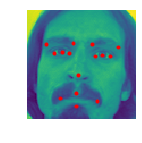

In [0]:
#plotting all the keypoints on the image 
plt.figure(figsize=(2,2))
plt.imshow(x[0])
plt.plot((X[x_1].T[0]),(X[x_2].T[0]),'.',color='red')
plt.axis('off')
#This is how the Image with the keypoints look in the given data

## Going for data training and testing:

In [0]:
train= data.drop('Image',axis = 1)

y_1 = []
for i in range(0,7049):
    y = train.iloc[i,:]

    y_1.append(y)
y_1 = np.array(y_1,dtype = 'float')

In [0]:
#dependent variable(output)
y_1.shape

(7049, 30)

In [0]:
type(y_1)

numpy.ndarray

In [0]:
#reshaped the independent variable to 4D (as it is colored image)
x_t =x.reshape(-1,96,96,1)
x_t.shape

(7049, 96, 96, 1)

## splitting the data into train and test

In [0]:
x_train, x_test,y_train,y_test = train_test_split(x_t,y_1,test_size = 0.3)

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4934, 96, 96, 1), (4934, 30), (2115, 96, 96, 1), (2115, 30))

## Applying the CNN model
CNN - - Convolution neural network

In [0]:
#Importing different modules required from keras
from keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPool2D
from keras.models import Sequential

model = Sequential()
# Convolution Process
model.add(Conv2D(input_shape=(96,96,1),filters=16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
#adding kernels
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2)))


model.add(Flatten()) # input to neural network
model.add(Dense(512,activation='relu')) # Layer1
model.add(Dense(30))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [0]:
#applying the optimizer for the support
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae','accuracy'])

In [0]:
#Fit the model to data
model_1 = model.fit(x=x_train,y=y_train,batch_size=256,validation_data=[x_test,y_test],epochs=50)

Instructions for updating:
Use tf.cast instead.
Train on 4934 samples, validate on 2115 samples
Epoch 1/50
4934/4934 [==============================] - 9s 2ms/step - loss: 715.8333 - mean_absolute_error: 20.8414 - acc: 0.4313 - val_loss: 161.2562 - val_mean_absolute_error: 10.1055 - val_acc: 0.4350
Epoch 2/50
4934/4934 [==============================] - 2s 431us/step - loss: 127.0192 - mean_absolute_error: 8.6597 - acc: 0.4335 - val_loss: 100.5073 - val_mean_absolute_error: 7.4349 - val_acc: 0.4293
Epoch 3/50
4934/4934 [==============================] - 2s 433us/step - loss: 101.5729 - mean_absolute_error: 7.5263 - acc: 0.5051 - val_loss: 89.2847 - val_mean_absolute_error: 7.0828 - val_acc: 0.5664
Epoch 4/50
4934/4934 [==============================] - 2s 434us/step - loss: 94.3183 - mean_absolute_error: 7.2479 - acc: 0.5389 - val_loss: 86.1340 - val_mean_absolute_error: 6.9411 - val_acc: 0.5641
Epoch 5/50
4934/4934 [==============================] - 2s 434us/step - loss: 88.2974 - mea

In [0]:
#Save the model 
model.save('F1.h5')

In [0]:
from tensorflow.keras.models import load_model

In [0]:
#load the model
model = load_model('F1.h5')

Instructions for updating:
Use tf.cast instead.


### Visualization of the loss for both train and test data

In [0]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [], [], [], []
    
    for model_1 in logs:
        trn_loss += model_1.history['loss']
        val_loss += model_1.history['val_loss']
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(trn_loss, label='train')
    ax.plot(val_loss, label='validation')
    ax.set_xlabel('epoch'); ax.set_ylabel('loss')
    ax.legend()

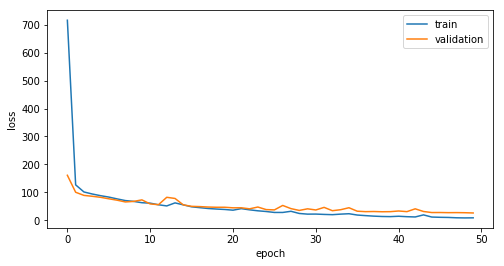

In [0]:
show_results(model_1)

In [0]:
#predicting the test data
model.predict(x_test)
#Here output obtained is a array with 30 keypoints which is our required one

array([[65.39583 , 36.56697 , 29.550743, ..., 70.49639 , 47.35831 ,
        75.82839 ],
       [62.91925 , 35.83468 , 29.325356, ..., 69.76133 , 47.603523,
        72.841965],
       [64.2068  , 38.134457, 31.786701, ..., 73.033455, 47.663746,
        75.76198 ],
       ...,
       [80.634766, 44.04141 , 36.568516, ..., 85.73562 , 57.638805,
        91.85355 ],
       [64.58789 , 35.94713 , 30.517815, ..., 71.80325 , 50.999306,
        74.65568 ],
       [63.881573, 34.772156, 27.343895, ..., 65.85303 , 45.253777,
        74.4699  ]], dtype=float32)

In [0]:
#defining to a variable
a = model.predict(x_test)

In [0]:
a.shape

(2115, 30)

## Displaying the output with test data images

In [0]:
#Doing the preprocessing as we done before
df = pd.DataFrame(a)
df.columns


RangeIndex(start=0, stop=30, step=1)

In [0]:
df.columns= list((data.drop(columns=['Image'],axis=1)).columns)
df.columns


Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [0]:
a_1 = list(df.columns)[0::2] # x_axis columns // sclycing alternate columns
a_2 = list(df.columns)[1::2]

In [0]:
a_2

['left_eye_center_y',
 'right_eye_center_y',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_y',
 'nose_tip_y',
 'mouth_left_corner_y',
 'mouth_right_corner_y',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_y']

In [0]:
x_test

array([[[[100.],
         [ 99.],
         [ 94.],
         ...,
         [155.],
         [158.],
         [159.]],

        [[100.],
         [ 99.],
         [ 94.],
         ...,
         [155.],
         [158.],
         [159.]],

        [[100.],
         [ 99.],
         [ 95.],
         ...,
         [155.],
         [158.],
         [159.]],

        ...,

        [[ 47.],
         [ 47.],
         [ 44.],
         ...,
         [ 92.],
         [ 94.],
         [ 94.]],

        [[ 40.],
         [ 40.],
         [ 40.],
         ...,
         [ 90.],
         [ 93.],
         [ 94.]],

        [[ 39.],
         [ 39.],
         [ 39.],
         ...,
         [ 90.],
         [ 93.],
         [ 94.]]],


       [[[121.],
         [131.],
         [139.],
         ...,
         [ 96.],
         [ 90.],
         [ 90.]],

        [[133.],
         [141.],
         [141.],
         ...,
         [103.],
         [100.],
         [106.]],

        [[133.],
         [148.],
      

In [0]:
x_tes = x_test.reshape(-1,96,96)
x_tes.shape

(2115, 96, 96)

(-0.5, 95.5, 95.5, -0.5)

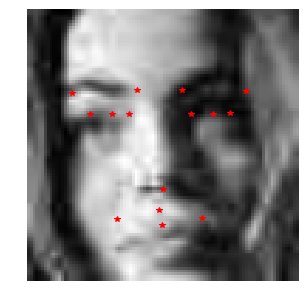

In [0]:
# Applying the modelsaved on to  the images in the test data 
#Displaying the image with key points
plt.figure(figsize=(5,5))
plt.imshow(x_tes[2],'gray')
plt.plot((df[a_1].T[0]),(df[a_2].T[0]),'*',color='red')
plt.axis('off')

## Testing the model with new image downloaded

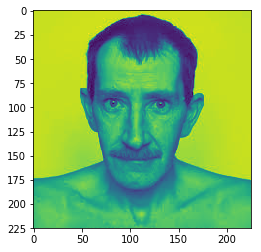

In [0]:
#Using opencv to read the image
import cv2
img =cv2.imread('test.jpg',0)#read the image
plt.imshow(img)


### Preprocessing the data of image

In [0]:
image = np.array(img,dtype = 'float')
image.shape

(225, 225)

In [0]:
imm = cv2.resize(image,(96,96))


In [0]:
ig = imm.reshape(-1,96,96)
ig.shape

(1, 96, 96)

### Applying the model saved 

(-0.5, 95.5, 95.5, -0.5)

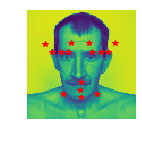

In [0]:
#Displaying the keypoints in the new image 
plt.figure(figsize=(2,2))
plt.imshow(ig[0])
plt.plot((df[a_1].T[0]),(df[a_2].T[0]),'*',color='red')
plt.axis('off')